In [1]:
import numpy as np
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

-1.000, 114172.075 , -1.299
1.000, 29095.711 , -2.829
3.000, 21326.973 , -3.040
2.000, 20598.952 , 1.136
-2.000, 19964.342 , -1.996
-5.000, 14630.203 , 0.107
5.000, 13788.415 , 0.041


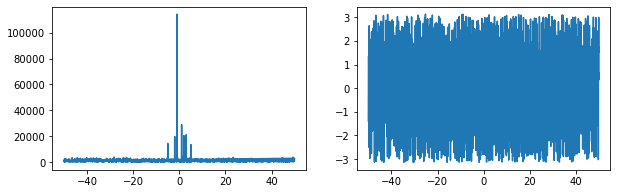

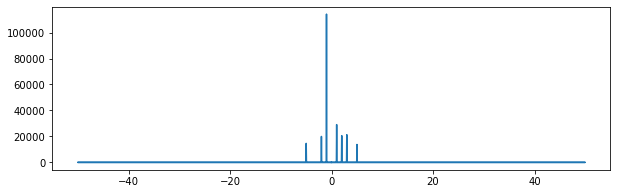

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fft as sfft


def calculate_spectrum(data, Fs):
    N = len(data)
    freq = sfft.fftfreq(n=N, d=1/Fs)
    S = sfft.fft(x)
    SA = np.absolute(S)
    SP = np.angle(S)
    return freq, SA, SP

freq, SA, SP = calculate_spectrum(x, 100)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(freq, SA)
ax[1].plot(freq, SP)
    
def remove_components(SA, M):
    idx_sort = np.argsort(SA)[::-1]
    SA_mod = SA.copy()
    SA_mod[idx_sort[M:]] = 0
    return SA_mod, idx_sort[:M]

        
SA_mod, maxima_idx = remove_components(SA, M=7)
for idx in maxima_idx:
    print(f"{freq[idx]:0.3f}, {SA[idx]:0.3f} , {SP[idx]:0.3f}")   

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(freq, SA_mod)

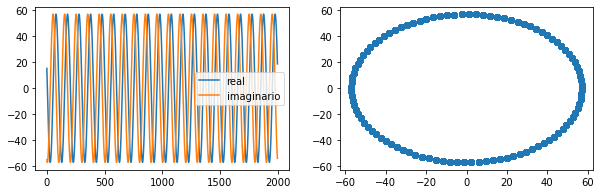

In [3]:
SA_mod, maxima_idx = remove_components(SA, M=1)

x_r = sfft.ifft(SA_mod*np.exp(1j*SP))

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(np.real(x_r), label='real')
ax[0].plot(np.imag(x_r), label='imaginario')
ax[0].legend()
ax[1].scatter(np.imag(x_r), np.real(x_r))